# Project: Spam Filter
---

## Project Overview

Task: Identifying spam using emails, <a href = 'https://www.kaggle.com/karthickveerakumar/spam-filter'>Spam filter | Kaggle</a>

## Data Exploration

The dataset consists of 5728 emails, which are marked either as spam (1) or ham (0).

The dataset comes in csv-format with columns "text" and "spam".

### Imports

In [14]:
import os
import csv
import random
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed (42)

### Data Extraction

In [2]:
datasetFile = os.path.join ('src', 'emails.csv')

header = True
X_raw = []
y_raw = []
with open (datasetFile, 'r') as csvFile:
    
    reader = csv.reader (csvFile, delimiter=',')
    for row in reader:
        
        # jump over header
        if (header):
            header = False
            continue
        
        # col "text"
        X_raw.append (row[0])
        # col "spam"
        y_raw.append (row[1])

m = len (X_raw)
print ('number of samples:', m)
print ('number of classes:', len (set (y_raw)), set (y_raw))

number of samples: 5728
number of classes: 2 {'1', '0'}


In [3]:
for _ in range (3):
    rndIdx = random.randint (0, m-1)
    print (X_raw[rndIdx], ',', y_raw[rndIdx], '\n')

Subject: rooming list for enron offsite  candice :  listed below are the individuals that will be attending the offsite , august  18 -  20 , 2000 .  vince kaminski  stinson gibner  p . v . krishnarao  grant masson  zimin lu  vasant shanbhogue  mike roberts  maureen raymond castaneda  tanya tamarchenko  osman sezgen  samer takriti  shirley crenshaw  regards ,  shirley crenshaw , 0 

Subject: re : fwd : latest roster - rice  no problem - pam  at 05 : 42 pm 3 / 7 / 01 - 0600 , you wrote :  > pam ,  >  > thanks ,  >  > yes , i need the e - mail addresses as well .  >  > vince  >  >  >  >  >  > pamela vande krol castro on 03 / 07 / 2001 04 : 19 : 01 pm  >  > to : vince . j . kaminski @ enron . com  > cc :  > subject : fwd : latest roster - rice  >  >  > let ' s try this again ! - pam  >  >  > > date : wed , 07 mar 2001 16 : 13 : 42 - 0600  > > to : vince . j . kaminski @ enron . com  > > from : pamela vande krol castro  > > subject : latest roster - rice  > >  > > here is your latest roster

maximum length of text: 13
minimum length of text: 43952


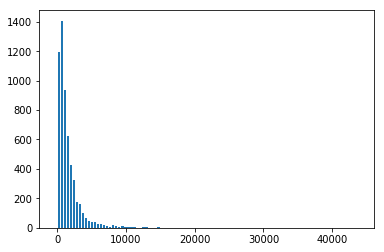

In [4]:
text_len = []
for text in X_raw:
    text_len.append (len (text))

print ('maximum length of text:', min (text_len))
print ('minimum length of text:', max (text_len))

step = (max (text_len) - min (text_len)) / 100
bins = np.arange (min (text_len) - step, max (text_len) + step, step)
fig, axs = plt.subplots (1, 1)
axs.hist (text_len, bins = bins, rwidth = 0.8)
plt.show ()

Every sample starts with 'Subject: '.

Samples contain words, numbers and non-word characters.

Samples are lower case.

Samples contain mail-typical words like 're', 'fw', 'cc'.

Samples language is English only.

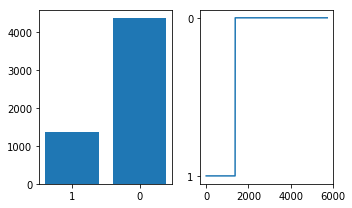

[1368. 4360.]


In [5]:
fig, axs = plt.subplots (1, 2)
n_bins, bins, _ = axs[0].hist (y_raw, bins = [-.5, .5, 1.5], rwidth = 0.8)
axs[1].plot (y_raw)
fig.set_size_inches (5, 3)
plt.tight_layout ()
plt.show ()

print (n_bins)

Dataset classes are unbalanced, i.e. there are more 'ham' than 'spam' mails.

Dataset is sorted.

## Benchmark
some other algorithm / software / result to compare this algorithm against (by using the defined metric)

---

## Metric

<table align = 'left' border = 1>
    <caption>Confusion Matrix</caption>
    <tbody>
        <tr>
            <td colspan = 2></td>
            <td colspan = 2>predicted</td>
        </tr>
        <tr>
            <td colspan = 2></td>
            <td>spam</td>
            <td>ham</td>
        </tr>
        <tr>
            <td rowspan = 2>true</td>
            <td>spam</td>
            <td>TP</td>
            <td>FN</td>
        </tr>
        <tr>
            <td>ham</td>
            <td>FP</td>
            <td>TN</td>
        </tr>
    </tbody>
</table>

The aim is to identify as many spam mails as possible. Furthermore, it is better to identify spam as ham rather than ham as spam (i.e. you want as less as possible ham in your spam folder, the FP shall be the weighting factor).

Therefore Precision (Positive Predictive Value PPV) is taken as metric:

$PPV = \frac {TP} {TP + FP}$


## Data Preprocessing

In [6]:
# remove string 'Subject: '
for i, text in enumerate (X_raw):
    X_raw[i] = re.sub (r'Subject: ', '', text)

In [7]:
# example of sklearn's CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
vec_example = CountVectorizer (
    stop_words = 'english',
    max_features = 4096,
    binary = True
)
text_docs = ['contact info  i will be in one of these two places',
        'but it is better to  call since i do not have']
text_docs_t = vec_example.fit_transform (text_docs).toarray ().astype ('f4')
print (vec_example.get_feature_names ())
print (text_docs_t)
#print (vec_example.get_stop_words ())

['better', 'contact', 'info', 'places']
[[0. 1. 1. 1.]
 [1. 0. 0. 0.]]


In [8]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer (
    stop_words = 'english',
    max_features = 4096,
    binary = True
)

X = vectorizer.fit_transform (X_raw).toarray ().astype ('f4') # returns a numpy ndarray

print ('shape of vectorized features:', X.shape)

shape of vectorized features: (5728, 4096)


In [9]:
y = np.array (y_raw).astype ('i4')

print ('shape of classes:', y.shape)

shape of classes: (5728,)


In [10]:
# split data
from sklearn.model_selection import train_test_split

X_, X_test, y_, y_test = train_test_split (X, y, test_size = 0.2, shuffle = True)
X_train, X_val, y_train, y_val = train_test_split (X_, y_, test_size = 0.2, shuffle = True)

print ('number of samples:')
print ('  training:', X_train.shape[0])
print ('  validation:', X_val.shape[0])
print ('  test:', X_test.shape[0])

number of samples:
  training: 3665
  validation: 917
  test: 1146


## Implementation

In [11]:
from mlpspafi import MlpSpafi
mlp = MlpSpafi ()

In [12]:
mlp.fit (X_train, y_train, X_val, y_val)

epoch # 0, batch # 46 / 46, train metric: 0.95 , val metric: 0.9704641350210971
val metric improved, model saved to ./tf_saves/run_MlpSpafi/best_acc_val.ckpt
epoch # 1, batch # 46 / 46, train metric: 1.0 , val metric: 0.9710743801652892
val metric improved, model saved to ./tf_saves/run_MlpSpafi/best_acc_val.ckpt
epoch # 2, batch # 46 / 46, train metric: 1.0 , val metric: 0.9710743801652892
epoch # 3, batch # 46 / 46, train metric: 1.0 , val metric: 0.975103734439834
val metric improved, model saved to ./tf_saves/run_MlpSpafi/best_acc_val.ckpt
epoch # 4, batch # 46 / 46, train metric: 1.0 , val metric: 0.975103734439834
epoch # 5, batch # 46 / 46, train metric: 1.0 , val metric: 0.975103734439834
early stopping after epoch 5


---

## Model Evaluation and Validation

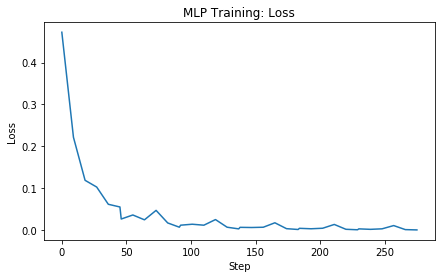

In [15]:
lossDataFile = os.path.join ('tf_logs_exp', 'run_run_MlpSpafi-20190314041454-tag-loss_1.csv')
lossData = pd.read_csv (lossDataFile, sep = ',', )

fig, axs = plt.subplots (1, 1)
axs.set_ylabel ('Loss')
axs.set_xlabel ('Step')
axs.set_title ('MLP Training: Loss')
lossData.plot ('Step', 'Value', ax = axs, legend = False)

fig.set_size_inches (7, 4)
plt.show ()

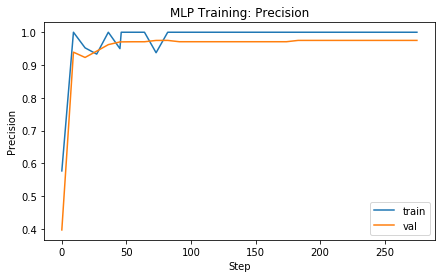

In [16]:
metricTrainDataFile = os.path.join ('tf_logs_exp', 'run_run_MlpSpafi-20190314041454-tag-metric_train.csv')
metricValDataFile = os.path.join ('tf_logs_exp', 'run_run_MlpSpafi-20190314041454-tag-metric_val.csv')
metricTrainData = pd.read_csv (metricTrainDataFile, sep = ',', )
metricValData = pd.read_csv (metricValDataFile, sep = ',', )

fig, axs = plt.subplots (1, 1)
axs.plot (metricTrainData['Step'], metricTrainData['Value'])
axs.plot (metricValData['Step'], metricValData['Value'])
axs.set_ylabel ('Precision')
axs.set_xlabel ('Step')
axs.set_title ('MLP Training: Precision')
axs.legend (['train', 'val'])

fig.set_size_inches (7, 4)
plt.show ()

In [13]:
# max acc val
print ('score validation set:', mlp.score (X_val, y_val))
# predictions
print ('score test set:', mlp.score (X_test, y_test))

INFO:tensorflow:Restoring parameters from ./tf_saves/run_MlpSpafi/best_acc_val.ckpt
score validation set: 0.975103734439834
INFO:tensorflow:Restoring parameters from ./tf_saves/run_MlpSpafi/best_acc_val.ckpt
score test set: 0.9893992932862191


In [17]:
from mlpspafi import MlpSpafi
mlp_best = MlpSpafi (name = 'MlpSpafi', restore = True)

y_pred, y_pred_distr = mlp_best.predict (X_test)

INFO:tensorflow:Restoring parameters from ./tf_saves/run_MlpSpafi/best_acc_val.ckpt


In [20]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix (y_test, y_pred).ravel ()
tn, fp, fn, tp

(853, 3, 10, 280)

<table align = 'left' border = 1>
    <caption>Confusion Matrix</caption>
    <tbody>
        <tr>
            <td colspan = 2></td>
            <td colspan = 2>predicted</td>
        </tr>
        <tr>
            <td colspan = 2></td>
            <td>spam</td>
            <td>ham</td>
        </tr>
        <tr>
            <td rowspan = 2>true</td>
            <td>spam</td>
            <td>280</td>
            <td>10</td>
        </tr>
        <tr>
            <td>ham</td>
            <td>3</td>
            <td>853</td>
        </tr>
    </tbody>
</table>

The precision of the estimator using the test data is 0.9894. The test precision is even better than the validation precision. The aim of this metric is to minimize the number of false positives. There are only 3 false positives, making up 3/13 = 23.1 % of all wrong predictions. The result is satisfactory.

## Conclusion

### Improvements

- make use of lemmatization or stemming
- increase number of DNN inputs
- replace binarization: make use of the count of words (in conjunction with min-max scaling)
- make DNN servable and capable for online learning